In [1]:
import pandas as pd
import numpy as np

In [2]:
df2 = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\external\cwfis_fwi2010s.csv')
df2.head()

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,sog,ffmc,dmc,dc,bui,isi,fwi,dsr,opts,calcstatus
0,1012475,71031,2010-01-01 12:00:00,9.1,8.1,93.5,19.0,NaN,160,1002.95,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=RH:R:M=1:,-3
1,1012710,71798,2010-01-01 12:00:00,7.3,7.3,100.0,2.0,NaN,90,1002.10,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M=1:,-3
2,1014820,71774,2010-01-01 12:00:00,5.8,5.8,100.0,7.4,NaN,154,1003.00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=RH:WSD:R:M=1:,-3
3,1015630,71927,2010-01-01 12:00:00,4.8,4.0,95.0,7.0,NaN,160,1001.20,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=R:M=1:,-3
4,1016640,71778,2010-01-01 12:00:00,8.9,7.4,90.7,9.0,NaN,80,1002.78,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IDW=T:RH:R:M=1:,-3


In [28]:
df2['fwi'].isna().sum()

2143435

In [3]:
wmo = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\external\master_location_identifier.csv',encoding='latin1')
wmo.head()

,country3,country2,country,region,subregion,place_name,station_name,type,stn_key,status,icao,national_id,wmo,wban,ghcn,special,lat,lon,elev,tz
0,ABW,AW,Aruba,-,-,Old Norwood,Old Norwood / John A. Osborne AP,NaN,0-20000-0-78850,-,NaN,NaN,78850.0,NaN,NaN,NaN,16.791111,-62.193333,166.7,America/Montserrat
1,ABW,AW,Aruba,SA,-,Saba|Upper Hell's Gate,Saba / Juancho E. Yrausquin AP,NaN,0-20000-0-78871,-,NaN,NaN,78871.0,NaN,NaN,NaN,17.646111,-63.220833,42.1,America/Kralendijk
2,AFG,AF,Afghanistan,BAL,-,Kyzylabad|Mazar-I-Sharif|Qizil?b?d,Kyzylabad,NaN,0-20000-0-40911,-,OAMS,NaN,40911.0,NaN,NaN,NaN,36.700000,67.200000,392.3,Asia/Kabul
3,AFG,AF,Afghanistan,BAL,-,Pushti-Bag|Mazari Sharif|Dehd?d?,Camp Spann,NaN,AFaaKQSP,-,KQSP,NaN,NaN,NaN,NaN,NaN,36.650400,66.996000,408.0,Asia/Kabul
4,AFG,AF,Afghanistan,BAL,-,Qala-i-Gul Mohd|Mazari Sharif|Qizil?b?d,Camp Marmal,NaN,AFaaKQML,-,KQML,NaN,NaN,NaN,NaN,NaN,36.703000,67.228000,391.0,Asia/Kabul


In [5]:
df1 = wmo[['country','wmo','lat','lon','elev','tz']]
df1


,country,wmo,lat,lon,elev,tz
0,Aruba,78850.0,16.791111,-62.193333,166.7,America/Montserrat
1,Aruba,78871.0,17.646111,-63.220833,42.1,America/Kralendijk
2,Afghanistan,40911.0,36.700000,67.200000,392.3,Asia/Kabul
3,Afghanistan,NaN,36.650400,66.996000,408.0,Asia/Kabul
4,Afghanistan,NaN,36.703000,67.228000,391.0,Asia/Kabul
...,...,...,...,...,...,...
43982,Unknown,NaN,NaN,NaN,NaN,NaN
43983,Unknown,NaN,NaN,NaN,NaN,NaN
43984,Unknown,NaN,NaN,NaN,NaN,NaN
43985,Unknown,NaN,NaN,NaN,NaN,NaN


In [6]:
df3 = pd.merge(df2,df1,on =['wmo'])
df3

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,isi,fwi,dsr,opts,calcstatus,country,lat,lon,elev,tz
0,1012475,71031,2010-01-01 12:00:00,9.1,8.1,93.5,19.0,NaN,160,1002.95,...,NaN,NaN,NaN,IDW=RH:R:M=1:,-3,Canada,48.420,-123.230,18.9,America/Vancouver
1,1012475,71031,2010-01-02 12:00:00,8.0,7.8,98.6,6.0,NaN,130,1021.13,...,NaN,NaN,NaN,IDW=RH:R:M=1:,-3,Canada,48.420,-123.230,18.9,America/Vancouver
2,1012475,71031,2010-01-03 12:00:00,7.1,6.0,92.8,17.0,NaN,350,1024.40,...,NaN,NaN,NaN,IDW=RH:R:M=1:,-3,Canada,48.420,-123.230,18.9,America/Vancouver
3,1012475,71031,2010-01-04 12:00:00,6.4,5.6,94.8,33.0,NaN,10,1014.35,...,NaN,NaN,NaN,IDW=RH:R:M=1:,-3,Canada,48.420,-123.230,18.9,America/Vancouver
4,1012475,71031,2010-01-05 12:00:00,7.1,6.4,95.4,28.0,NaN,360,1020.24,...,NaN,NaN,NaN,IDW=RH:R:M=1:,-3,Canada,48.420,-123.230,18.9,America/Vancouver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609834,8201969,73030,2019-12-29 12:00:00,-1.9,-5.0,79.0,41.7,50.3,333,1012.50,...,NaN,NaN,NaN,IDW=R:M=1:,-3,Canada,46.550,-61.050,12.8,America/Halifax
3609835,8201969,73030,2019-12-30 12:00:00,0.3,-1.6,87.0,34.4,42.5,23,1018.30,...,NaN,NaN,NaN,IDW=R:M=1:,-3,Canada,46.550,-61.050,12.8,America/Halifax
3609836,8201969,73030,2019-12-31 12:00:00,-0.5,-5.2,71.0,12.0,41.2,150,1018.60,...,NaN,NaN,NaN,IDW=R:M=1:,-3,Canada,46.550,-61.050,12.8,America/Halifax
3609837,PEA,6064,2019-11-05 12:00:00,-8.6,-11.0,77.0,7.0,7.0,0,1006.21,...,0.0,0.0,0.0,M=1:ProvFwi,1,Denmark,56.367,8.583,17.0,Europe/Copenhagen


In [9]:
df3.dropna(subset=['fwi'], inplace=True)

In [10]:
df3

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,isi,fwi,dsr,opts,calcstatus,country,lat,lon,elev,tz
135,1012475,71031,2010-05-16 12:00:00,12.1,9.7,85.0,5.6,NaN,290,1011.79,...,1.9,1.6,0.1,IDW=RH:R:M=1:ArealFMs:,1,Canada,48.420,-123.230,18.9,America/Vancouver
136,1012475,71031,2010-05-17 12:00:00,12.9,10.6,86.1,5.6,NaN,150,1007.32,...,1.7,1.3,0.0,IDW=RH:R:M=1:,1,Canada,48.420,-123.230,18.9,America/Vancouver
137,1012475,71031,2010-05-18 12:00:00,12.5,11.4,92.9,7.4,NaN,30,1010.86,...,0.6,0.4,0.0,IDW=RH:R:M=1:,1,Canada,48.420,-123.230,18.9,America/Vancouver
138,1012475,71031,2010-05-19 12:00:00,15.5,6.5,55.6,35.2,NaN,90,1003.91,...,6.6,7.9,1.1,IDW=RH:R:M=1:,1,Canada,48.420,-123.230,18.9,America/Vancouver
139,1012475,71031,2010-05-20 12:00:00,11.7,3.5,57.8,14.8,NaN,240,1019.44,...,1.4,0.9,0.0,IDW=RH:R:M=1:,1,Canada,48.420,-123.230,18.9,America/Vancouver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609817,8201969,73030,2019-12-12 12:00:00,-2.9,-6.4,77.0,58.7,81.1,268,1024.00,...,0.2,0.0,0.0,IDW=R:M=1:,1,Canada,46.550,-61.050,12.8,America/Halifax
3609820,8201969,73030,2019-12-15 12:00:00,14.2,9.1,72.0,29.8,49.1,190,984.80,...,0.4,0.1,0.0,IDW=R:M=1:,1,Canada,46.550,-61.050,12.8,America/Halifax
3609821,8201969,73030,2019-12-16 12:00:00,-3.6,-6.5,80.0,65.3,86.0,267,1000.90,...,9.0,3.8,0.3,IDW=R:M=1:,1,Canada,46.550,-61.050,12.8,America/Halifax
3609822,8201969,73030,2019-12-17 12:00:00,-1.7,-4.7,80.0,37.7,46.1,270,1010.70,...,3.7,0.9,0.0,IDW=R:M=1:,1,Canada,46.550,-61.050,12.8,America/Halifax


In [13]:
df3['country'].nunique()

13

In [14]:
df3['country'].unique()

array(['Canada', 'United States', 'United Kingdom', 'Isle of Man',
       'Germany', 'Russia', 'India', 'Ethiopia', 'Japan', 'France',
       'Spain', 'Faroe Islands', 'Denmark'], dtype=object)

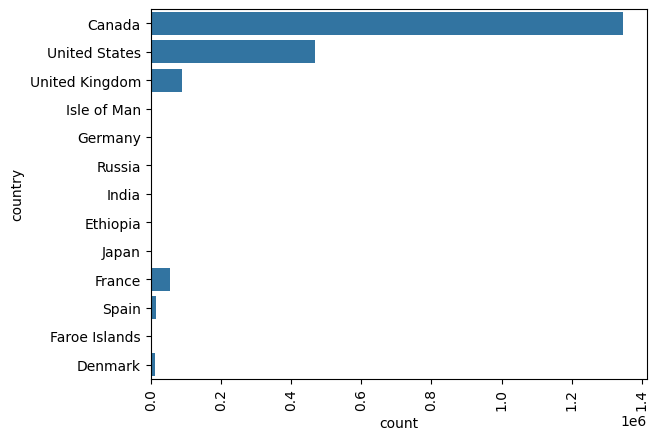

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(y= 'country', data = df3)
plt.xticks(rotation=90)   
plt.show()

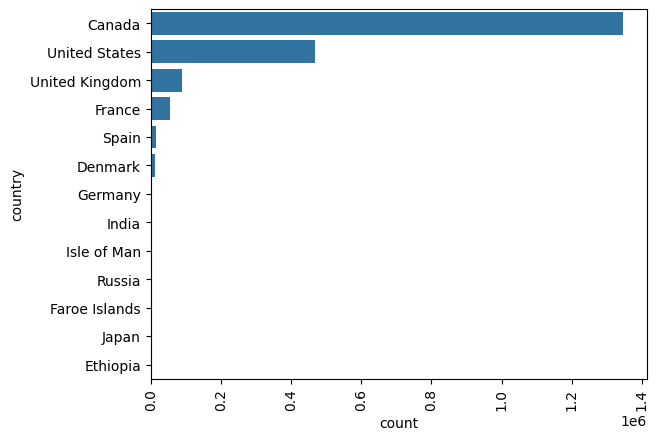

In [22]:
sns.countplot(y='country', 
                   data=df3, 
                   order=df3['country'].value_counts().index)

plt.xticks(rotation=90)
plt.show()

In [29]:
countries = ['Canada', 'United States', 'United Kingdom', 'France', 'Spain']

dataset = df3[df3['country'].isin(countries)]
dataset

,aes,wmo,rep_date,temp,td,rh,ws,wg,wdir,pres,...,isi,fwi,dsr,opts,calcstatus,country,lat,lon,elev,tz
135,1012475,71031,2010-05-16 12:00:00,12.1,9.7,85.0,5.6,NaN,290,1011.79,...,1.9,1.6,0.1,IDW=RH:R:M=1:ArealFMs:,1,Canada,48.42,-123.23,18.9,America/Vancouver
136,1012475,71031,2010-05-17 12:00:00,12.9,10.6,86.1,5.6,NaN,150,1007.32,...,1.7,1.3,0.0,IDW=RH:R:M=1:,1,Canada,48.42,-123.23,18.9,America/Vancouver
137,1012475,71031,2010-05-18 12:00:00,12.5,11.4,92.9,7.4,NaN,30,1010.86,...,0.6,0.4,0.0,IDW=RH:R:M=1:,1,Canada,48.42,-123.23,18.9,America/Vancouver
138,1012475,71031,2010-05-19 12:00:00,15.5,6.5,55.6,35.2,NaN,90,1003.91,...,6.6,7.9,1.1,IDW=RH:R:M=1:,1,Canada,48.42,-123.23,18.9,America/Vancouver
139,1012475,71031,2010-05-20 12:00:00,11.7,3.5,57.8,14.8,NaN,240,1019.44,...,1.4,0.9,0.0,IDW=RH:R:M=1:,1,Canada,48.42,-123.23,18.9,America/Vancouver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609816,8201969,73030,2019-12-11 12:00:00,-1.4,-3.6,84.9,36.3,45.6,347,1018.10,...,0.0,0.0,0.0,IDW=RH:R:M=1:,1,Canada,46.55,-61.05,12.8,America/Halifax
3609817,8201969,73030,2019-12-12 12:00:00,-2.9,-6.4,77.0,58.7,81.1,268,1024.00,...,0.2,0.0,0.0,IDW=R:M=1:,1,Canada,46.55,-61.05,12.8,America/Halifax
3609820,8201969,73030,2019-12-15 12:00:00,14.2,9.1,72.0,29.8,49.1,190,984.80,...,0.4,0.1,0.0,IDW=R:M=1:,1,Canada,46.55,-61.05,12.8,America/Halifax
3609821,8201969,73030,2019-12-16 12:00:00,-3.6,-6.5,80.0,65.3,86.0,267,1000.90,...,9.0,3.8,0.3,IDW=R:M=1:,1,Canada,46.55,-61.05,12.8,America/Halifax


In [30]:
dataset.to_csv(r'E:\Info_Srping\FWI_Prediction\Data\raw\raw_dataset1.csv', index=False)